# Daten importieren

In [ ]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("travel_influencer_data.csv")
df

,Years of Travel Experience,Average Annual Travel Expense (USD),Owns a Travel Blog
0,13,2527,True
1,17,2321,False
2,2,4952,False
3,4,4115,False
4,4,2134,False
...,...,...,...
284,5,5745,False
285,11,4599,False
286,20,7930,False
287,3,2181,False


In [ ]:
# Schritt 2: Analysiere die Daten mithilfe von '.describe()'
df.describe()

,Years of Travel Experience,Average Annual Travel Expense (USD)
count,289.000000,289.000000
mean,10.429066,5410.910035
std,5.349843,2500.707146
min,2.000000,1060.000000
25%,5.000000,3352.000000
50%,10.000000,5361.000000
75%,15.000000,7514.000000
max,20.000000,9926.000000


# Daten visualisieren

<Axes: xlabel='Years of Travel Experience', ylabel='Average Annual Travel Expense (USD)'>

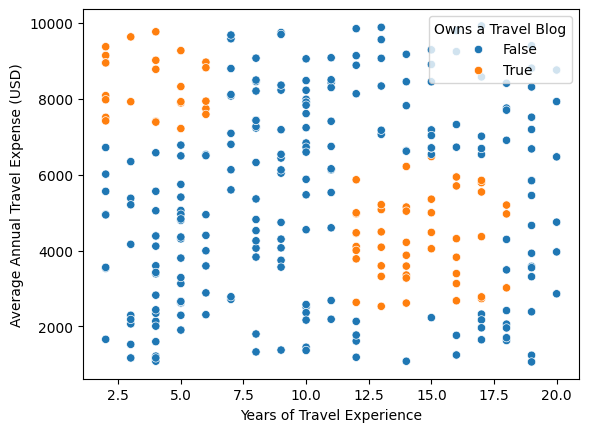

In [ ]:
import seaborn as sns

# Schritt 3: Führe diese Zelle aus, um die Daten zu visualisieren und festzustellen, welche Kernelfunktion du später benötigen wirst.
sns.scatterplot(x=df["Years of Travel Experience"], y=df["Average Annual Travel Expense (USD)"], hue=df["Owns a Travel Blog"])

# Daten aufteilen

In [ ]:
# Schritt 4: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.
X = df.copy()
y = X.pop("Owns a Travel Blog")

In [ ]:
X

,Years of Travel Experience,Average Annual Travel Expense (USD)
0,13,2527
1,17,2321
2,2,4952
3,4,4115
4,4,2134
...,...,...
284,5,5745
285,11,4599
286,20,7930
287,3,2181


In [ ]:
y

0       True
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288     True
Name: Owns a Travel Blog, Length: 289, dtype: bool

In [ ]:
# Schritt 5: Verwende .value_counts(), um den prozentualen Anteil jeder Klasse in y anzuzeigen.
y.value_counts() / len(y)

False    0.750865
True     0.249135
Name: Owns a Travel Blog, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Schritt 6: Teile die Daten in Trainings- und Testdaten auf. Die Testdaten sollten 20% des Gesamtdatensatzes ausmachen und prozentual dieselbe Anzahl von Klassen wie die Trainingsdaten enthalten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Daten skalieren

In [ ]:
from sklearn.preprocessing import StandardScaler

# Schritt 7: Erstelle eine Instanz eines StandardScalers und rufe '.fit()' auf X_train auf.
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Trainingsdaten visualisieren

<Axes: xlabel='Years of Travel Experience', ylabel='Average Annual Travel Expense (USD)'>

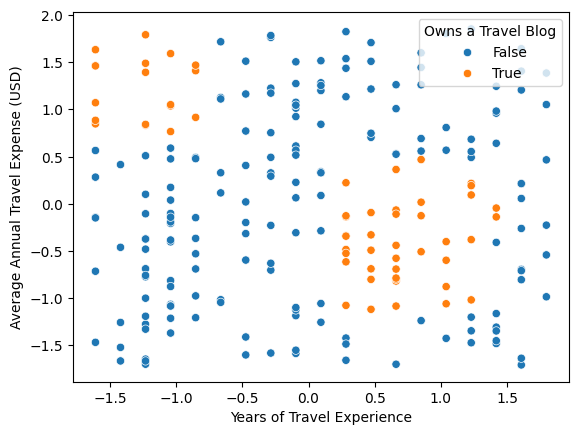

In [ ]:
import seaborn as sns

# Schritt 8: Führe diese Zelle aus, um die Trainingsdaten zu visualisieren.
sns.scatterplot(x=X_train_scaled["Years of Travel Experience"], y=X_train_scaled["Average Annual Travel Expense (USD)"], hue=y_train)

# Support Vector Classifier - Hyperparameteroptimierung


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Schritt 9: Setze die Kernelfunktion von dem Support-Vector-Classifier entsprechend.
model = SVC(kernel="rbf")

# Schritt 10: Erstelle zwei Listen mit verschiedenen Werten für die beiden Hyperparameter C und gamma.
param_grid = {
    "C": [100, 200],
    "gamma": [2, 3, 4, 5, 6]
}

# Schritt 11: Setze bei GridSearchCV die Anzahl an Folds auf 4 und scoring auf "accuracy".
grid_search = GridSearchCV(model, param_grid, cv=4, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Accuracy:  0.9827586206896552
Best Parameter:  {'C': 100, 'gamma': 3}


In [ ]:
# Schritt 12: Speichere den besten Support-Vector-Classifier in 'final_model' ab mithilfe von '.best_estimator_'
final_model = grid_search.best_estimator_

# Support Vector Classifier - Entscheidungsgrenze visualisieren

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


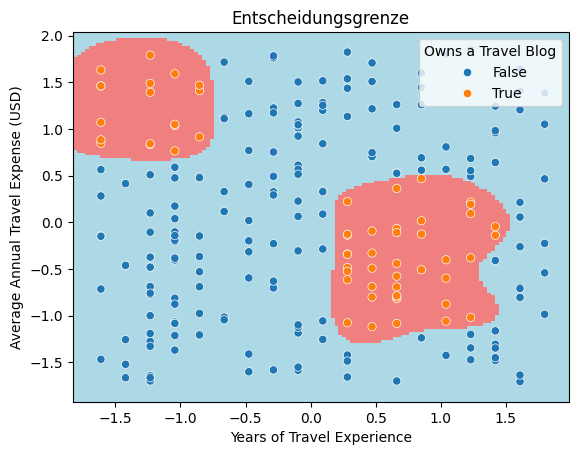

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Schritt 13: Führe diese Zelle aus, um die Entscheidungsgrenzen des Modells und die Trainingsdaten zu visualisieren.
def plot_decision_boundaries(model, feature_1, feature_2, target):
    # Grenzen des Plots basierend auf den Merkmalen definieren
    x_min, x_max = feature_1.min() - 0.2, feature_1.max() + 0.2
    y_min, y_max = feature_2.min() - 0.2, feature_2.max() + 0.2

    # Ein Gitter von Punkten mit einem Abstand von 0.03 zwischen ihnen erstellen
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))

    # Vorhersagen für jeden Punkt im Gitter generieren und die Form der Ausgabe anpassen
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Hintergrund des Plots mit den Vorhersagen färben
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(["lightblue", "lightcoral"]))

    # Scatterplot der tatsächlichen Datenpunkte
    sns.scatterplot(x=feature_1, y=feature_2, hue=target)

    # Beschriftung der Achsen und Titel
    plt.xlabel(feature_1.name)
    plt.ylabel(feature_2.name)
    plt.title("Entscheidungsgrenze")

plot_decision_boundaries(final_model, X_train_scaled["Years of Travel Experience"], X_train_scaled["Average Annual Travel Expense (USD)"], y_train)

# Finale Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Schritt 14: Generiere die Vorhersagen für 'X_test_scaled' und berechne damit die finale Accuracy basierend auf den Testdaten.
y_predict = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.9827586206896551


# Confusion Matrix

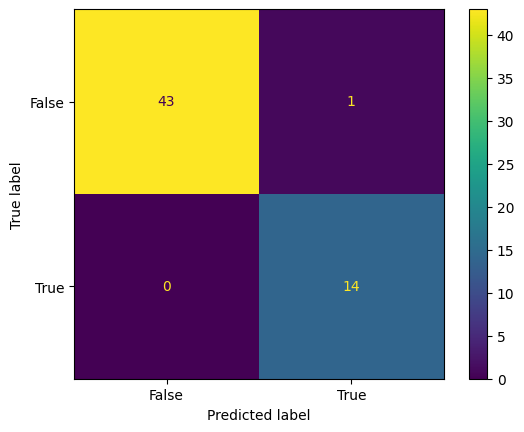

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Schritt 15: Erstelle eine Confusion Matrix basierend auf den Testdaten und den Vorhersagen, um detailliert zu analysieren, welche Fehler das Modell gemacht hat.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


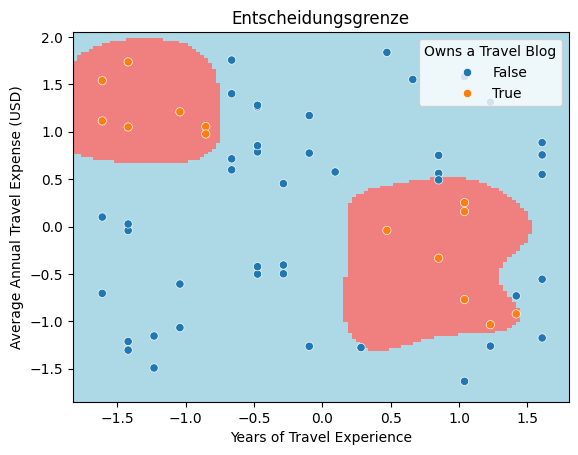

In [ ]:
# Schritt 16: Führe diese Zelle aus, um die Entscheidungsgrenzen des Modells und die Testsdaten zu visualisieren.
plot_decision_boundaries(final_model, X_test_scaled["Years of Travel Experience"], X_test_scaled["Average Annual Travel Expense (USD)"], y_test)